In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from utils import normal_distance_eval

data = pd.read_csv("captura.csv", sep = ';') 
# data = data[:100]
# data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
# data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

In [28]:
data.head()

,Frame,time,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3
0,0,0.00,-0.180618,0.149802,-0.159743,-0.039086,0.150296,-0.347928,0.085621,0.764084,0.075863
1,1,0.01,-0.179731,0.149818,-0.159161,-0.038237,0.150239,-0.347206,0.086371,0.764374,0.078371
2,2,0.02,-0.178906,0.149811,-0.158637,-0.037356,0.150188,-0.346620,0.087247,0.764664,0.080828
3,3,0.03,-0.178171,0.149652,-0.158014,-0.036412,0.150135,-0.346009,0.088232,0.765296,0.083106
4,4,0.04,-0.177268,0.149736,-0.157470,-0.035564,0.150104,-0.345337,0.088814,0.765545,0.085977


In [31]:
def rfilter(row):
    return abs(row['X1']) < 6 and abs(row['Y1']) < 6 and abs(row['Z1']) < 6 and abs(row['X2']) < 6 and abs(row['Y2']) < 6 and abs(row['Z2']) < 6 and \
abs(row['X3']) < 6 and abs(row['Y3']) < 6 and abs(row['Z3']) < 6

m = data.apply(rfilter, axis=1)

In [34]:
data = data[m]

<IPython.core.display.Javascript object>


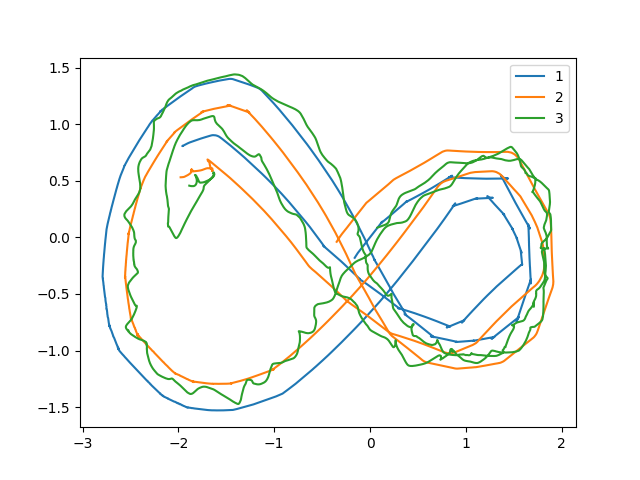

In [39]:
%matplotlib notebook

plt.plot(data['Z1'],data['X1'], label='1')
plt.plot(data['Z2'], data['X2'], label='2')
plt.plot(data['Z3'], data['X3'], label='3')
plt.legend()
plt.show()

In [4]:
rz = np.array(data['robot_z'])
rx = np.array(data['robot_x'])
robot_coords = np.array(list(zip(rz, rx)))

lz = np.array(data['subject_z'])
lx = np.array(data['subject_x'])
leader_coords = np.array(list(zip(lz, lx)))

In [5]:
leader_path_cum_length = [0]

for i in range(1, len(leader_coords)):
    dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
    leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)
    
robot_dist_to_leader_path, distance_score = normal_distance_eval(robot_coords, leader_coords)

<IPython.core.display.Javascript object>


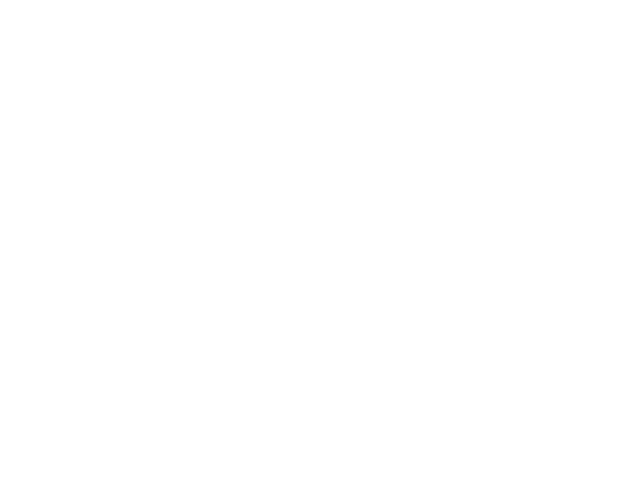

In [6]:
%matplotlib notebook

plt.plot(leader_path_cum_length, robot_dist_to_leader_path)
plt.show()

In [7]:
print('Total distance to leader:', distance_score)

Total distance to leader: 589.922352883


# Lemniscates

Generate the trajectory for the leader mathematically using lemniscates

In [8]:
%matplotlib notebook

def plot_lemniscate_animated(ts, xs, ys, xlim = (-1, 1), ylim=(-1, 1)):
    fig,ax = plt.subplots(1,1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    line, = ax.plot([], [])
    for i in range(len(ts) + 1):
        line.set_xdata(xs[0:i])
        line.set_ydata(ys[0:i])
        fig.canvas.draw()
        
    plt.show()

## Gerono Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [9]:
def generate_gerono_lemniscate_t(coords_len):
    p1 = np.arange(0, np.pi + 0.000001, (np.pi)/(coords_len/2))
    p2 = np.arange(-np.pi - 0.000001, 0, (np.pi)/(coords_len/2))
#     print(p1)
#     print(p2)
    return np.concatenate((p1, p2))

<IPython.core.display.Javascript object>


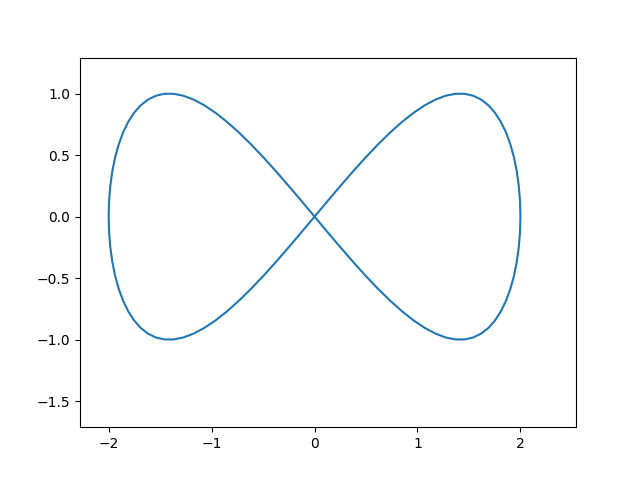

In [10]:
%matplotlib notebook

A = 2
ts = np.array(generate_gerono_lemniscate_t(100))
xs = np.array([A * np.sin(t) for t in ts])
ys = np.array([A * np.sin(t) * np.cos(t) for t in ts])

plot_lemniscate_animated(ts, xs, ys, (-5,5), (-3,3))

In [11]:
generate_gerono_lemniscate_t(4000)[3950]

-0.080111612666730281

In [12]:
A = 2
tp = -0.08011161266673028
print(A * np.sin(tp))
print(A * np.sin(tp) * np.cos(tp))

-0.160051898336
-0.159538576783


## Bernoulli Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [13]:
def generate_bernoulli_lemniscate_t(coords_len):
    p1 = np.arange(np.pi/2, 0, -(np.pi)/(coords_len/2))
    p2 = np.arange(0, -np.pi, -(np.pi)/(coords_len/2))
    p3 = np.arange(np.pi, np.pi/2 - 0.0001, -(np.pi)/(coords_len/2))
    return np.concatenate((p1, p2, p3))

<IPython.core.display.Javascript object>


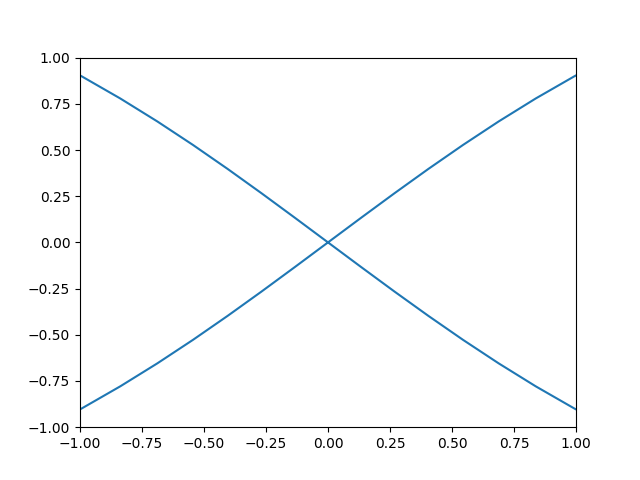

In [14]:
A = 3
ts = np.array(generate_bernoulli_lemniscate_t(100))
xs = np.array([(A * np.sqrt(2) * np.cos(t))/(np.sin(t)**2 + 1) for t in ts])
ys = np.array([(A * np.sqrt(2) * np.cos(t) * np.sin(t)/(np.sin(t)**2 + 1)) for t in ts])

plot_lemniscate_animated(ts, xs, ys)